# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\karlk\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


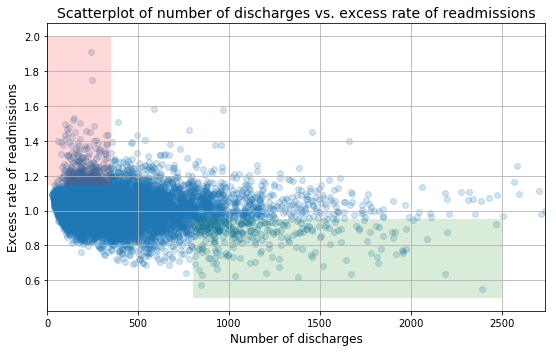

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

To set up the test, the data will need to be subset to the appropriate groups for small and large hospitals.

In [5]:
df = pd.DataFrame({'ND': x, 'ERR': y})
SmallHosp = df.loc[df.ND<100]; LargeHosp = df.loc[df.ND>1000]

Next we will run an individual t test, if the p vaule is small enough we can conclude that we have statistical evidence of a difference between small and large hospitals.

In [6]:
import scipy.stats as stats
stats.ttest_ind(SmallHosp.ERR, LargeHosp.ERR, equal_var=False)

Ttest_indResult(statistic=7.4900620603250729, pvalue=2.7928704570174404e-13)

There is statistical evidence of a difference in the mean of the small and large hosiptals, meaning we reject of the null hypothesis. Next we can test the pearson correlation between ERR and ND rates.

In [7]:
stats.pearsonr(x,y)

(-0.093095542875904408, 1.5022756426464526e-23)

It appears that there is a very weak correlation, but also has evidence of being a statistically significant relationship.

*The scatter plot from the study looks suspicious, it appears to imply a __stronger__ magnitude of a correlation than what the pearson test shows.*

Next, it would be worth investigating the distribution of Excess Readmits and Number of Discharges.

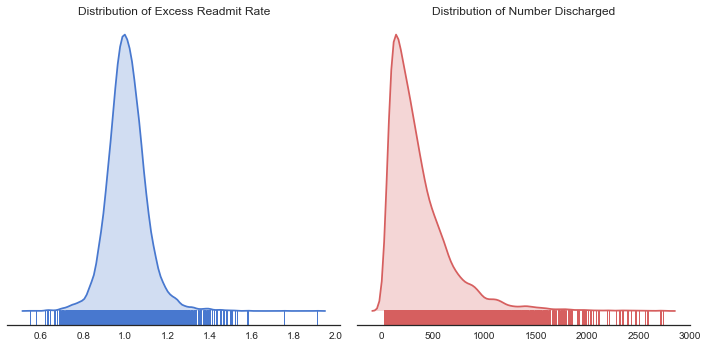

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(10, 5)) #, sharex=True
sns.despine(left=True)

# Plot a kernel density estimate and rug plot for ND
sns.distplot(x, 
             hist=False, 
             kde_kws={"shade": True},
             rug=True, 
             color="r", 
             ax=axes[1]).set_title('Distribution of Number Discharged')

# Plot a kernel density estimate and rug plot for ERR
sns.distplot(y, 
             hist=False, 
             kde_kws={"shade": True}
             ,rug=True, 
             color="b", 
             ax=axes[0]).set_title('Distribution of Excess Readmit Rate')

plt.subplots_adjust(top=0.9)
plt.setp(axes, yticks=[])
plt.tight_layout()

Based on the distributions of the 2 variables it appears the that Number of Discharges are very skewed, whereas the distribution of the Excess Readmit Rate is much more normal.

__*A better scatterplot could be to plot the Excess Readmit Rate versus Log Number of Discharges, such as the plot below:*__

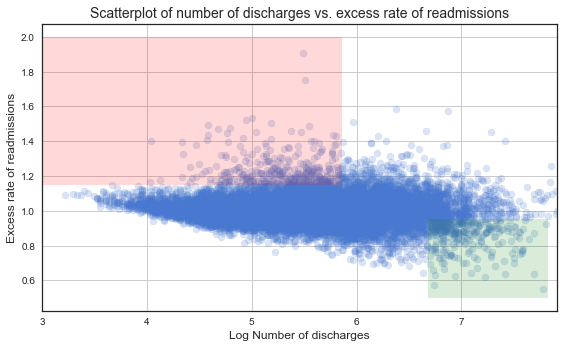

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

lx = np.log(x)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(lx, y,alpha=0.2)

ax.fill_between([3,np.log(350)], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([np.log(800),np.log(2500)], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([3, max(lx)])
ax.set_xlabel('Log Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

By plotting the log transformation of the number of discharges you can see that the claims for the first analysis are not as pronounced as shown in the first plot. Results from the Pearson test are the same whether the log or non-transformed discharge numbers